In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.11.0'

In [ ]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
from tensorflow.keras.datasets import mnist 

In [ ]:
(X_train, y_train), (X_test,y_test) = mnist.load_data()

In [ ]:
print(len(X_train))
print(X_train.shape)
print()
print(len(y_train))
print(y_train[0:5])

60000
(60000, 28, 28)

60000
[5 0 4 1 9]


In [ ]:
print(len(X_test))
print(X_test.shape)
print()
print(len(y_test))
print(y_test[0:5])

10000
(10000, 28, 28)

10000
[7 2 1 0 4]


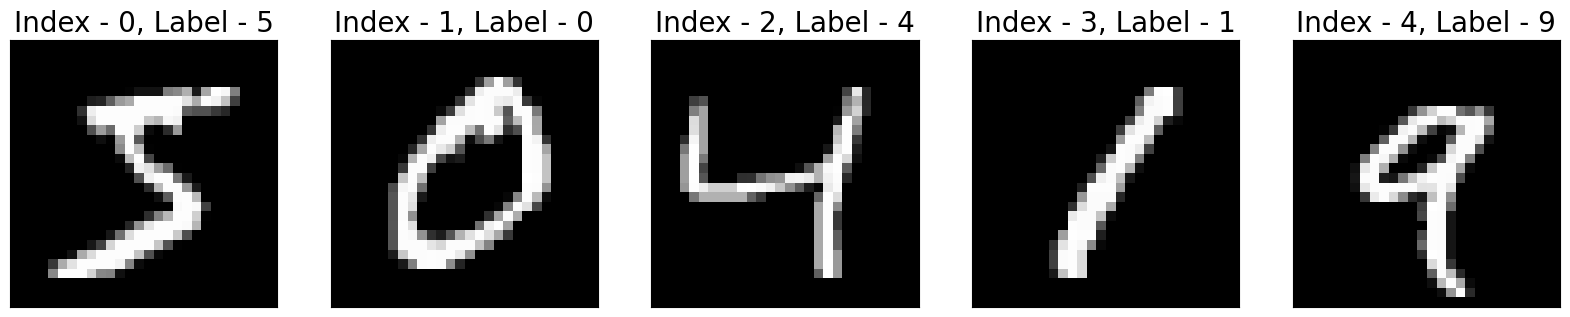

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (20, 4))
for idx in range(5):
  label = y_train[idx]
  plt.subplot(1, 5, idx + 1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(X_train[idx], cmap = 'gray')
  plt.title('Index - %d, Label - %d' % (idx, label), fontsize = 20) 
plt.show() 


In [ ]:
import numpy as np
np.set_printoptions(linewidth = 150, precision = 2) 
print(X_train[4]) 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  55 148 210 253 253 113  87 148  55   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  87 232 252 253 189 210 252 252 25

In [ ]:
X_train = X_train.astype(float) / 255 
X_test = X_test.astype(float) / 255 

In [ ]:
X_train = X_train.reshape((60000, 28 * 28)) 
X_test = X_test.reshape((10000, 28 * 28)) 
X_train.shape, X_test.shape 

((60000, 784), (10000, 784))

In [ ]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(y_train[:5])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_valid,y_train,y_valid = train_test_split(X_train,y_train, test_size = 0.2, random_state = 2045)

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers

mnist = models.Sequential()
mnist.add(layers.Dense(512, activation = 'relu', input_shape = (28 * 28,)))
mnist.add(layers.Dense(256, activation = 'relu'))
mnist.add(layers.Dense(10, activation = 'softmax'))

In [ ]:
mnist.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 512)               401920    
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 10)                2570      
                                                                 
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [ ]:
mnist.compile(loss = 'categorical_crossentropy', 
              optimizer = 'rmsprop', 
              metrics = ['accuracy']) 

In [ ]:
Hist_mnist = mnist.fit(X_train, y_train, 
                       epochs = 100, 
                       batch_size = 128, 
                       validation_data = (X_valid, y_valid)) 

Epoch 1/100
375/375 [==============================] - 6s 4ms/step - loss: 0.2592 - accuracy: 0.9212 - val_loss: 0.1355 - val_accuracy: 0.9600
Epoch 2/100
375/375 [==============================] - 1s 4ms/step - loss: 0.0944 - accuracy: 0.9704 - val_loss: 0.0980 - val_accuracy: 0.9716
Epoch 3/100
375/375 [==============================] - 2s 4ms/step - loss: 0.0621 - accuracy: 0.9800 - val_loss: 0.0883 - val_accuracy: 0.9743
Epoch 4/100
375/375 [==============================] - 2s 5ms/step - loss: 0.0418 - accuracy: 0.9866 - val_loss: 0.0983 - val_accuracy: 0.9715
Epoch 5/100
375/375 [==============================] - 1s 4ms/step - loss: 0.0300 - accuracy: 0.9899 - val_loss: 0.0866 - val_accuracy: 0.9782
Epoch 6/100
375/375 [==============================] - 2s 5ms/step - loss: 0.0213 - accuracy: 0.9935 - val_loss: 0.1157 - val_accuracy: 0.9716
Epoch 7/100
375/375 [==============================] - 1s 3ms/step - loss: 0.0147 - accuracy: 0.9956 - val_loss: 0.0977 - val_accuracy: 0.9781

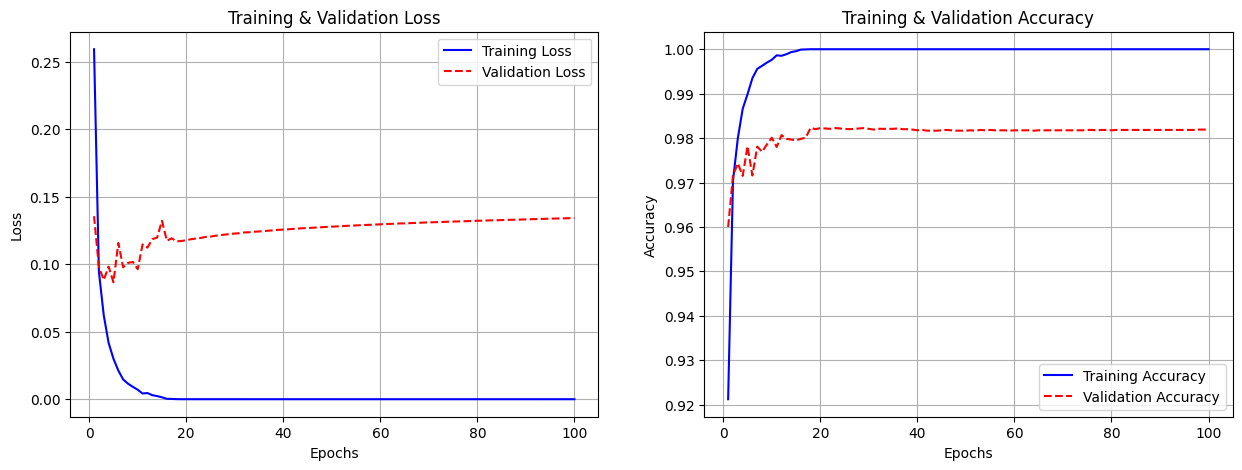

In [ ]:
import matplotlib.pyplot as plt 
epochs = range(1, len(Hist_mnist.history['loss']) + 1) 
plt.figure(figsize = (15, 5)) 
plt.subplot(1, 2, 1) 
plt.plot(epochs, Hist_mnist.history['loss'], 'b-') 
plt.plot(epochs, Hist_mnist.history['val_loss'], 'r--') 
plt.title('Training & Validation Loss') 
plt.xlabel('Epochs') 
plt.ylabel('Loss') 
plt.legend(['Training Loss', 'Validation Loss']) 
plt.grid() 
plt.subplot(1, 2, 2) 
plt.plot(epochs, Hist_mnist.history['accuracy'], 'b-') 
plt.plot(epochs, Hist_mnist.history['val_accuracy'], 'r--') 
plt.title('Training & Validation Accuracy') 
plt.xlabel('Epochs') 
plt.ylabel('Accuracy') 
plt.legend(['Training Accuracy', 'Validation Accuracy']) 
plt.grid() 
plt.show()

In [ ]:
loss, accuracy = mnist.evaluate(X_test, y_test, verbose = 0) 
print('Loss = {:.5f}'.format(loss)) 
print('Accuracy = {:.5f}'.format(accuracy)) 

Loss = 0.10855
Accuracy = 0.98380


In [ ]:
np.set_printoptions(suppress = True, precision = 9) 
print(mnist.predict(X_test[:1,:], verbose = 0)) 

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


In [ ]:
print(np.argmax(mnist.predict(X_test[:1,:], verbose = 0))) 

7


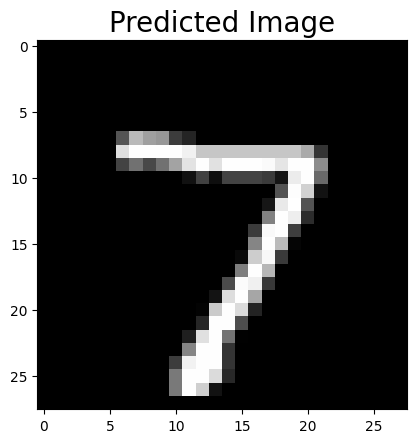

In [ ]:
plt.imshow(X_test[0].reshape(28, 28), cmap = 'gray') 
plt.title('Predicted Image', fontsize = 20) 
plt.show() 

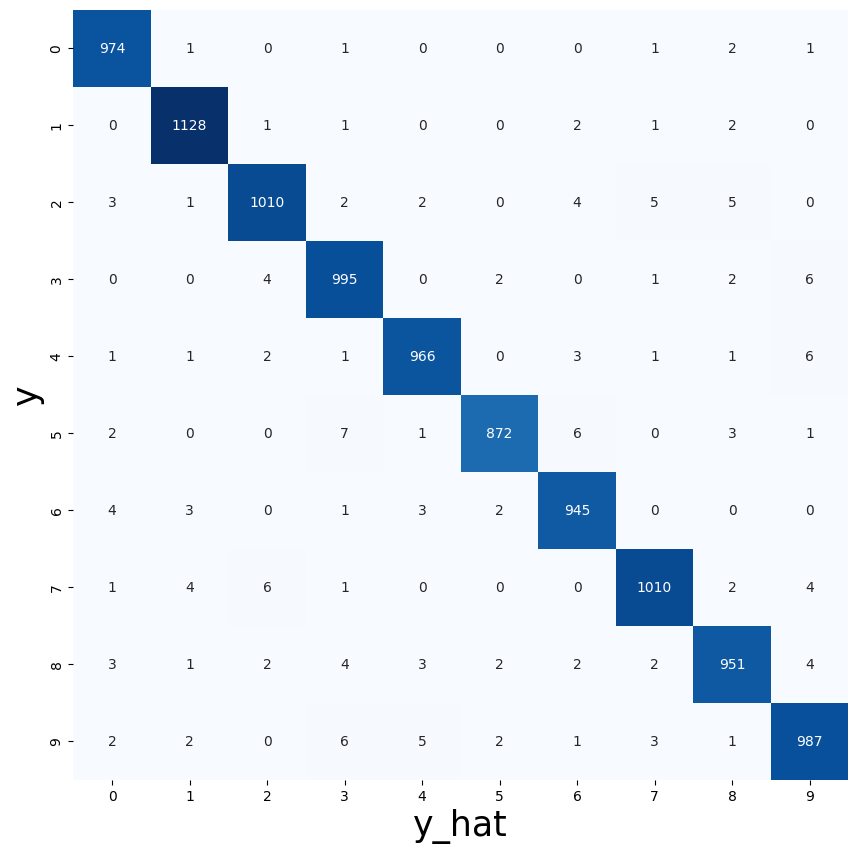

In [ ]:
from sklearn.metrics import confusion_matrix 
import matplotlib.pyplot as plt 
import seaborn as sns 
CM = confusion_matrix(np.argmax(y_test, axis = 1), 
                      np.argmax(mnist.predict(X_test, verbose = 0), axis = 1)) 
plt.figure(figsize = (10, 10)) 
sns.heatmap(CM, 
            annot = True, 
            fmt = 'd', 
            cmap = 'Blues',  
            cbar = False) 
plt.xlabel('y_hat', fontsize = 25) 
plt.ylabel('y', fontsize = 25) 
plt.show()

In [ ]:
from sklearn.metrics import classification_report 
print('\n',  classification_report(np.argmax(y_test, axis = 1),  
np.argmax(mnist.predict(X_test, verbose = 0), axis = 1))) 



               precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.98      0.98      1032
           3       0.98      0.99      0.98      1010
           4       0.99      0.98      0.98       982
           5       0.99      0.98      0.98       892
           6       0.98      0.99      0.98       958
           7       0.99      0.98      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers

mnist_capdown = models.Sequential()
mnist_capdown.add(layers.Dense(256, activation = 'relu', input_shape = (28 * 28,)))
mnist_capdown.add(layers.Dense(10, activation = 'softmax'))

In [ ]:
mnist_capdown.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [ ]:
mnist_capdown.compile(loss = 'categorical_crossentropy', 
              optimizer = 'rmsprop', 
              metrics = ['accuracy']) 

In [ ]:
Hist_mnist_capdown = mnist_capdown.fit(X_train, y_train, 
                       epochs = 100, 
                       batch_size = 128, 
                       validation_data = (X_valid, y_valid)) 

Epoch 1/100
375/375 [==============================] - 6s 4ms/step - loss: 0.3284 - accuracy: 0.9074 - val_loss: 0.1974 - val_accuracy: 0.9423
Epoch 2/100
375/375 [==============================] - 1s 4ms/step - loss: 0.1475 - accuracy: 0.9569 - val_loss: 0.1446 - val_accuracy: 0.9599
Epoch 3/100
375/375 [==============================] - 2s 5ms/step - loss: 0.1009 - accuracy: 0.9709 - val_loss: 0.1197 - val_accuracy: 0.9654
Epoch 4/100
375/375 [==============================] - 3s 7ms/step - loss: 0.0748 - accuracy: 0.9778 - val_loss: 0.1000 - val_accuracy: 0.9711
Epoch 5/100
375/375 [==============================] - 1s 3ms/step - loss: 0.0581 - accuracy: 0.9830 - val_loss: 0.1009 - val_accuracy: 0.9710
Epoch 6/100
375/375 [==============================] - 1s 3ms/step - loss: 0.0460 - accuracy: 0.9866 - val_loss: 0.0985 - val_accuracy: 0.9707
Epoch 7/100
375/375 [==============================] - 1s 3ms/step - loss: 0.0373 - accuracy: 0.9896 - val_loss: 0.0875 - val_accuracy: 0.9756

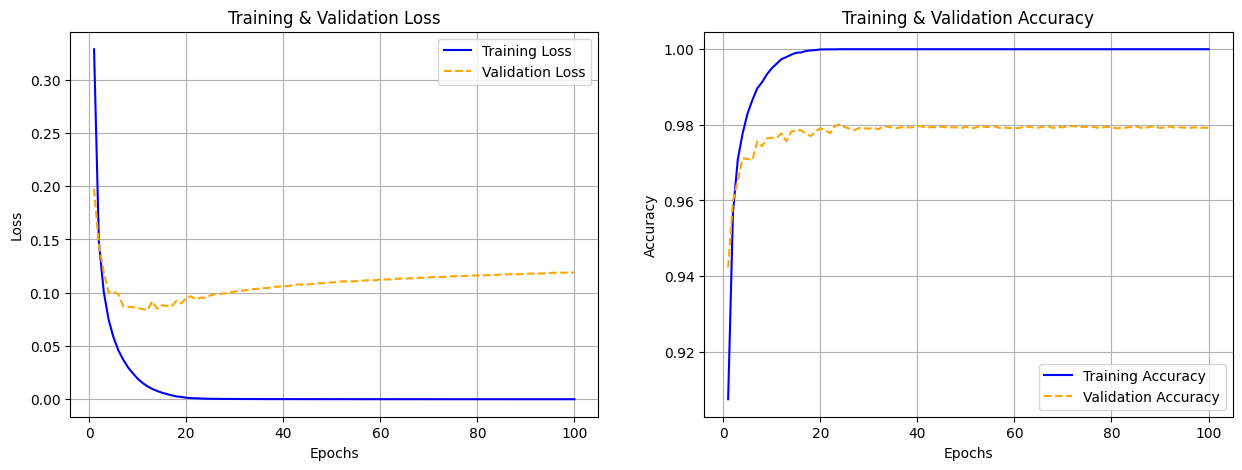

In [ ]:
import matplotlib.pyplot as plt 
epochs = range(1, len(Hist_mnist_capdown.history['loss']) + 1) 
plt.figure(figsize = (15, 5)) 
plt.subplot(1, 2, 1) 
plt.plot(epochs, Hist_mnist_capdown.history['loss'], 'b-') 
plt.plot(epochs, Hist_mnist_capdown.history['val_loss'],'--', color = 'orange') 
plt.title('Training & Validation Loss') 
plt.xlabel('Epochs') 
plt.ylabel('Loss') 
plt.legend(['Training Loss', 'Validation Loss']) 
plt.grid() 
plt.subplot(1, 2, 2) 
plt.plot(epochs, Hist_mnist_capdown.history['accuracy'], 'b-') 
plt.plot(epochs, Hist_mnist_capdown.history['val_accuracy'], '--', color = 'orange') 
plt.title('Training & Validation Accuracy') 
plt.xlabel('Epochs') 
plt.ylabel('Accuracy') 
plt.legend(['Training Accuracy', 'Validation Accuracy']) 
plt.grid() 
plt.show()

In [ ]:
loss, accuracy = mnist_capdown.evaluate(X_test, y_test, verbose = 0) 
print('Loss = {:.5f}'.format(loss)) 
print('Accuracy = {:.5f}'.format(accuracy)) 

Loss = 0.10200
Accuracy = 0.97950


### L2.Regulariztion 적용

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import regularizers
mnist_l2 = models.Sequential()
mnist_l2.add(layers.Dense(512, activation = 'relu',
                          kernel_regularizer = regularizers.l2(0.00001), 
                          input_shape = (28 * 28,)))
mnist_l2.add(layers.Dense(256, activation = 'relu',
                          kernel_regularizer = regularizers.l2(0.00001)))
mnist_l2.add(layers.Dense(10, activation = 'softmax'))

In [ ]:
mnist_l2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 512)               401920    
                                                                 
 dense_9 (Dense)             (None, 256)               131328    
                                                                 
 dense_10 (Dense)            (None, 10)                2570      
                                                                 
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [ ]:
mnist_l2.compile(loss = 'categorical_crossentropy', 
              optimizer = 'rmsprop', 
              metrics = ['accuracy']) 

In [ ]:
Hist_mnist_l2 = mnist_l2.fit(X_train, y_train, 
                       epochs = 100, 
                       batch_size = 128, 
                       validation_data = (X_valid, y_valid)) 

Epoch 1/100
375/375 [==============================] - 3s 5ms/step - loss: 0.2705 - accuracy: 0.9206 - val_loss: 0.1802 - val_accuracy: 0.9498
Epoch 2/100
375/375 [==============================] - 2s 4ms/step - loss: 0.1059 - accuracy: 0.9707 - val_loss: 0.1171 - val_accuracy: 0.9681
Epoch 3/100
375/375 [==============================] - 2s 4ms/step - loss: 0.0734 - accuracy: 0.9812 - val_loss: 0.0969 - val_accuracy: 0.9761
Epoch 4/100
375/375 [==============================] - 2s 4ms/step - loss: 0.0558 - accuracy: 0.9864 - val_loss: 0.1032 - val_accuracy: 0.9749
Epoch 5/100
375/375 [==============================] - 1s 4ms/step - loss: 0.0442 - accuracy: 0.9901 - val_loss: 0.0997 - val_accuracy: 0.9777
Epoch 6/100
375/375 [==============================] - 1s 4ms/step - loss: 0.0350 - accuracy: 0.9934 - val_loss: 0.1067 - val_accuracy: 0.9771
Epoch 7/100
375/375 [==============================] - 2s 5ms/step - loss: 0.0314 - accuracy: 0.9946 - val_loss: 0.1226 - val_accuracy: 0.9724

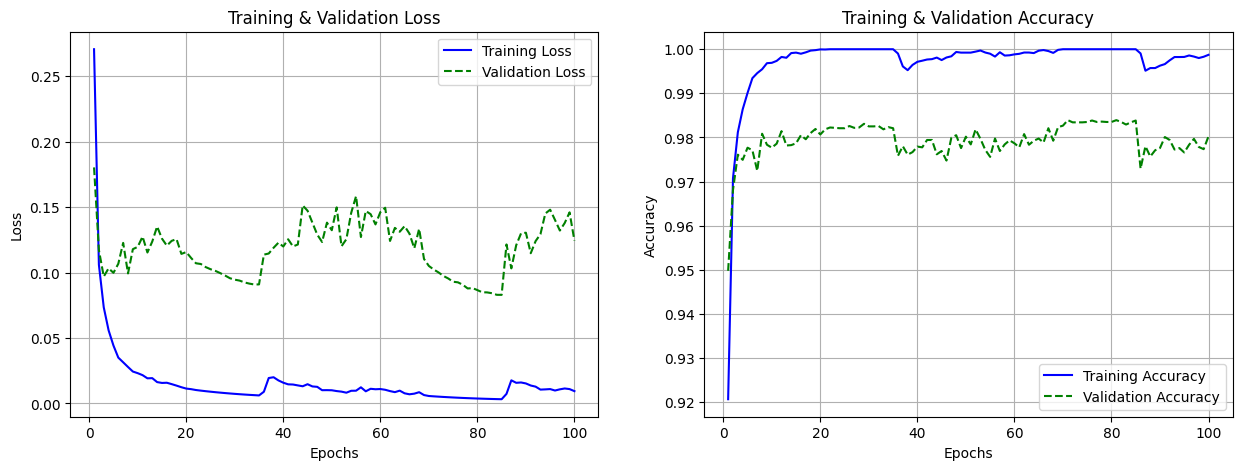

In [ ]:
import matplotlib.pyplot as plt 
epochs = range(1, len(Hist_mnist_l2.history['loss']) + 1) 
plt.figure(figsize = (15, 5)) 
plt.subplot(1, 2, 1) 
plt.plot(epochs, Hist_mnist_l2.history['loss'], 'b-') 
plt.plot(epochs, Hist_mnist_l2.history['val_loss'],'--', color = 'green') 
plt.title('Training & Validation Loss') 
plt.xlabel('Epochs') 
plt.ylabel('Loss') 
plt.legend(['Training Loss', 'Validation Loss']) 
plt.grid() 
plt.subplot(1, 2, 2) 
plt.plot(epochs, Hist_mnist_l2.history['accuracy'], 'b-') 
plt.plot(epochs, Hist_mnist_l2.history['val_accuracy'], '--', color = 'green') 
plt.title('Training & Validation Accuracy') 
plt.xlabel('Epochs') 
plt.ylabel('Accuracy') 
plt.legend(['Training Accuracy', 'Validation Accuracy']) 
plt.grid() 
plt.show()

In [ ]:
loss, accuracy = mnist_l2.evaluate(X_test, y_test, verbose = 0) 
print('Loss = {:.5f}'.format(loss)) 
print('Accuracy = {:.5f}'.format(accuracy)) 

Loss = 0.11510
Accuracy = 0.97870


### Dropout 적용

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import regularizers
mnist_drop = models.Sequential()
mnist_drop.add(layers.Dense(512, activation = 'relu', input_shape = (28 * 28,)))
mnist_drop.add(layers.Dropout(0.4))
mnist_drop.add(layers.Dense(256, activation = 'relu'))
mnist_drop.add(layers.Dropout(0.2))
mnist_drop.add(layers.Dense(10, activation = 'softmax'))

In [ ]:
mnist_drop.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_12 (Dense)            (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_13 (Dense)            (None, 10)                2570      
                                                                 
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [ ]:
mnist_drop.compile(loss = 'categorical_crossentropy', 
              optimizer = 'rmsprop', 
              metrics = ['accuracy']) 

In [ ]:
Hist_mnist_drop = mnist_drop.fit(X_train, y_train, 
                       epochs = 100, 
                       batch_size = 128, a
                       validation_data = (X_valid, y_valid)) 

Epoch 1/100
375/375 [==============================] - 3s 5ms/step - loss: 0.3257 - accuracy: 0.9012 - val_loss: 0.1472 - val_accuracy: 0.9560
Epoch 2/100
375/375 [==============================] - 3s 7ms/step - loss: 0.1461 - accuracy: 0.9556 - val_loss: 0.1205 - val_accuracy: 0.9665
Epoch 3/100
375/375 [==============================] - 3s 8ms/step - loss: 0.1101 - accuracy: 0.9669 - val_loss: 0.1040 - val_accuracy: 0.9712
Epoch 4/100
375/375 [==============================] - 4s 11ms/step - loss: 0.0918 - accuracy: 0.9708 - val_loss: 0.0957 - val_accuracy: 0.9746
Epoch 5/100
375/375 [==============================] - 3s 7ms/step - loss: 0.0791 - accuracy: 0.9759 - val_loss: 0.0904 - val_accuracy: 0.9758
Epoch 6/100
375/375 [==============================] - 3s 7ms/step - loss: 0.0693 - accuracy: 0.9787 - val_loss: 0.0862 - val_accuracy: 0.9756
Epoch 7/100
375/375 [==============================] - 3s 8ms/step - loss: 0.0624 - accuracy: 0.9802 - val_loss: 0.0857 - val_accuracy: 0.977

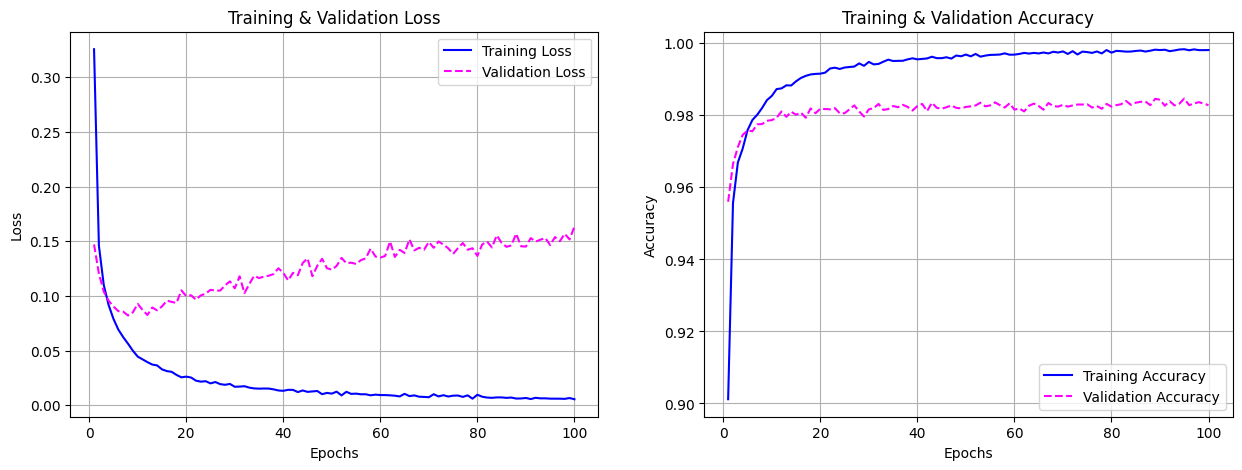

In [ ]:
import matplotlib.pyplot as plt 
epochs = range(1, len(Hist_mnist_drop.history['loss']) + 1) 
plt.figure(figsize = (15, 5)) 
plt.subplot(1, 2, 1) 
plt.plot(epochs, Hist_mnist_drop.history['loss'], 'b-') 
plt.plot(epochs, Hist_mnist_drop.history['val_loss'],'--', color = 'magenta') 
plt.title('Training & Validation Loss') 
plt.xlabel('Epochs') 
plt.ylabel('Loss') 
plt.legend(['Training Loss', 'Validation Loss']) 
plt.grid() 
plt.subplot(1, 2, 2) 
plt.plot(epochs, Hist_mnist_drop.history['accuracy'], 'b-') 
plt.plot(epochs, Hist_mnist_drop.history['val_accuracy'], '--', color = 'magenta') 
plt.title('Training & Validation Accuracy') 
plt.xlabel('Epochs') 
plt.ylabel('Accuracy') 
plt.legend(['Training Accuracy', 'Validation Accuracy']) 
plt.grid() 
plt.show()

In [ ]:
loss, accuracy = mnist_drop.evaluate(X_test, y_test, verbose = 0) 
print('Loss = {:.5f}'.format(loss)) 
print('Accuracy = {:.5f}'.format(accuracy)) 

Loss = 0.11304
Accuracy = 0.98570


### Batch Normalization 적용


In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers

mnist_bn = models.Sequential()
mnist_bn.add(layers.Dense(512,input_shape = (28 * 28,)))
mnist_bn.add(layers.BatchNormalization())
mnist_bn.add(layers.Activation('relu'))
mnist_bn.add(layers.Dense(256))
mnist_bn.add(layers.BatchNormalization())
mnist_bn.add(layers.Activation('relu'))
mnist_bn.add(layers.Dense(10, activation = 'softmax'))

In [ ]:
mnist_bn.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 512)               401920    
                                                                 
 batch_normalization_2 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                                                 
 activation_2 (Activation)   (None, 512)               0         
                                                                 
 dense_18 (Dense)            (None, 256)               131328    
                                                                 
 batch_normalization_3 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 activation_3 (Activation)   (None, 256)              

In [ ]:
mnist_bn.compile(loss = 'categorical_crossentropy', 
              optimizer = 'rmsprop', 
              metrics = ['accuracy']) 

In [ ]:
Hist_mnist_bn = mnist_bn.fit(X_train, y_train, 
                       epochs = 100, 
                       batch_size = 128, 
                       validation_data = (X_valid, y_valid)) 

Epoch 1/100
375/375 [==============================] - 4s 7ms/step - loss: 0.1790 - accuracy: 0.9466 - val_loss: 0.1480 - val_accuracy: 0.9582
Epoch 2/100
375/375 [==============================] - 2s 6ms/step - loss: 0.0706 - accuracy: 0.9774 - val_loss: 0.0942 - val_accuracy: 0.9727
Epoch 3/100
375/375 [==============================] - 2s 5ms/step - loss: 0.0441 - accuracy: 0.9862 - val_loss: 0.0906 - val_accuracy: 0.9744
Epoch 4/100
375/375 [==============================] - 2s 5ms/step - loss: 0.0293 - accuracy: 0.9909 - val_loss: 0.0818 - val_accuracy: 0.9774
Epoch 5/100
375/375 [==============================] - 2s 5ms/step - loss: 0.0217 - accuracy: 0.9930 - val_loss: 0.0921 - val_accuracy: 0.9747
Epoch 6/100
375/375 [==============================] - 2s 5ms/step - loss: 0.0154 - accuracy: 0.9950 - val_loss: 0.1096 - val_accuracy: 0.9731
Epoch 7/100
375/375 [==============================] - 2s 5ms/step - loss: 0.0122 - accuracy: 0.9962 - val_loss: 0.1071 - val_accuracy: 0.9747

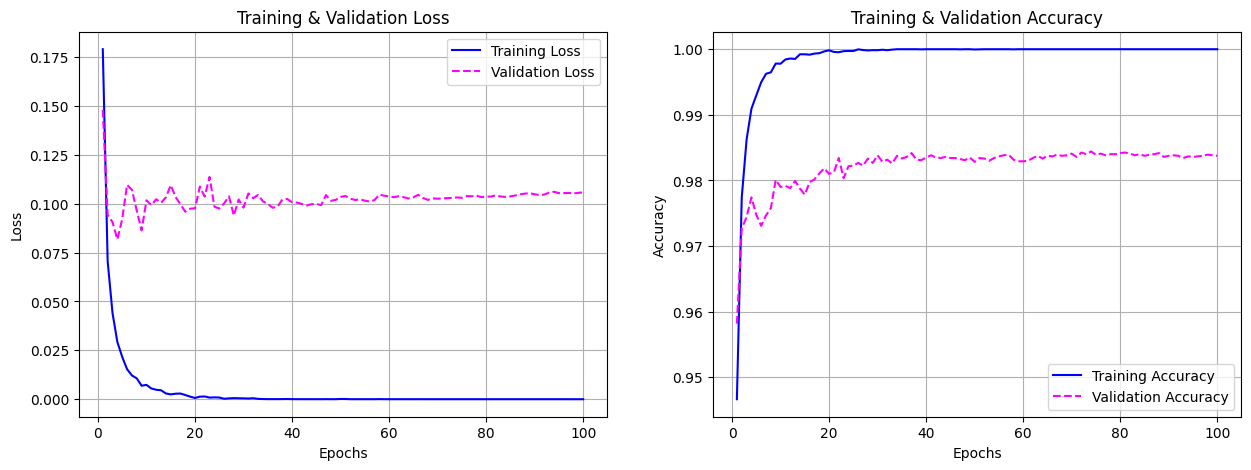

In [ ]:
import matplotlib.pyplot as plt 
epochs = range(1, len(Hist_mnist_bn.history['loss']) + 1) 
plt.figure(figsize = (15, 5)) 
plt.subplot(1, 2, 1) 
plt.plot(epochs, Hist_mnist_bn.history['loss'], 'b-') 
plt.plot(epochs, Hist_mnist_bn.history['val_loss'],'--', color = 'magenta') 
plt.title('Training & Validation Loss') 
plt.xlabel('Epochs') 
plt.ylabel('Loss') 
plt.legend(['Training Loss', 'Validation Loss']) 
plt.grid() 
plt.subplot(1, 2, 2) 
plt.plot(epochs, Hist_mnist_bn.history['accuracy'], 'b-') 
plt.plot(epochs, Hist_mnist_bn.history['val_accuracy'], '--', color = 'magenta') 
plt.title('Training & Validation Accuracy') 
plt.xlabel('Epochs') 
plt.ylabel('Accuracy') 
plt.legend(['Training Accuracy', 'Validation Accuracy']) 
plt.grid() 
plt.show()

In [ ]:
loss, accuracy = mnist_bn.evaluate(X_test, y_test, verbose = 0) 
print('Loss = {:.5f}'.format(loss)) 
print('Accuracy = {:.5f}'.format(accuracy)) 

Loss = 0.09034
Accuracy = 0.98570
